In [72]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [73]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [74]:
from pymc3_models.models.LinearRegression import LinearRegression

In [75]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

Generate Synthetic Data
===

In [79]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [80]:
Y = np.squeeze(Y)

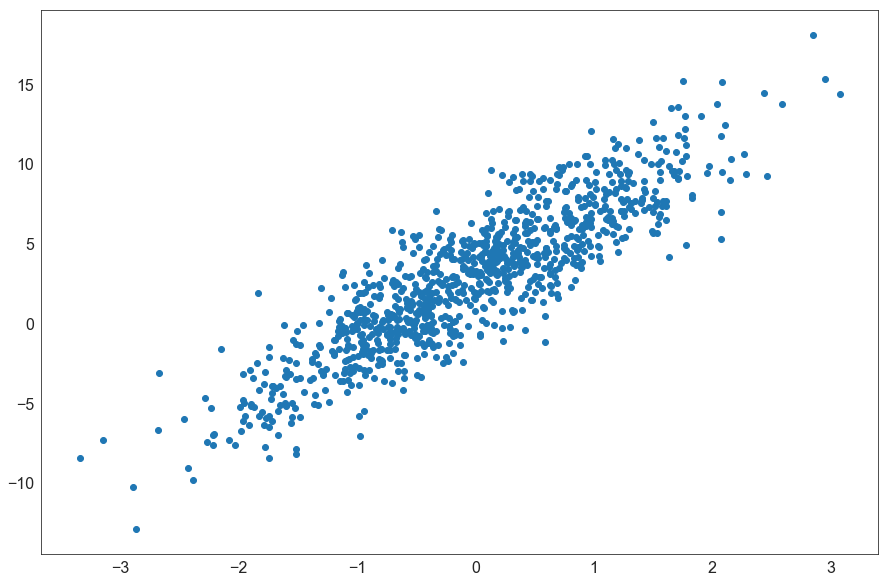

In [81]:
plt.scatter(X, Y)

Fit w/ ADVI
===

In [82]:
LR = LinearRegression()

In [83]:
LR = LR.fit(X, Y, minibatch_size=100)

/anaconda3/envs/Main/lib/python3.6/site-packages/pymc3/data.py:244: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
Average Loss = 231.24:  20%|██        | 40585/200000 [00:18<01:11, 2215.26it/s]
Convergence achieved at 40800
Interrupted at 40,799 [20%]: Average Loss = 432.52


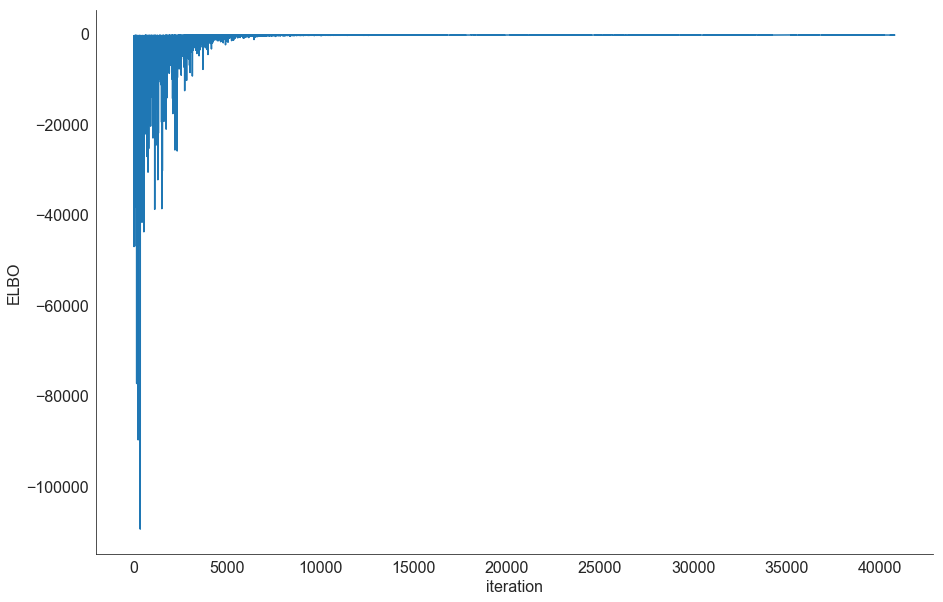

In [84]:
LR.plot_elbo()

In [85]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:25<00:00, 77.73it/s]


In [86]:
LR.score(X, Y)

100%|██████████| 2000/2000 [00:25<00:00, 77.13it/s]


0.7813542293301308

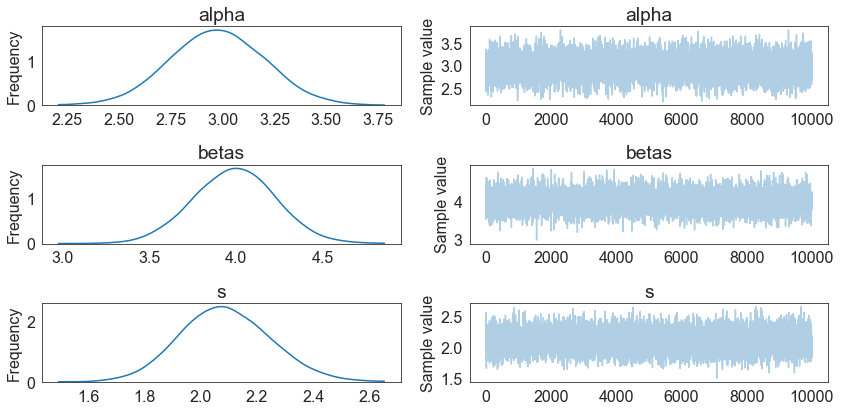

In [87]:
traceplot(LR.trace)
plt.show()

In [88]:
coefs.head()

,coef,mean,sd,mc_error,hpd_2.5,hpd_97.5
0,alpha__0,3.026366,0.215613,0.002102,2.621735,3.473009
1,betas__0_0,3.978103,0.216717,0.001963,3.569205,4.415026
2,s,1.966488,0.147733,0.001469,1.683366,2.253486


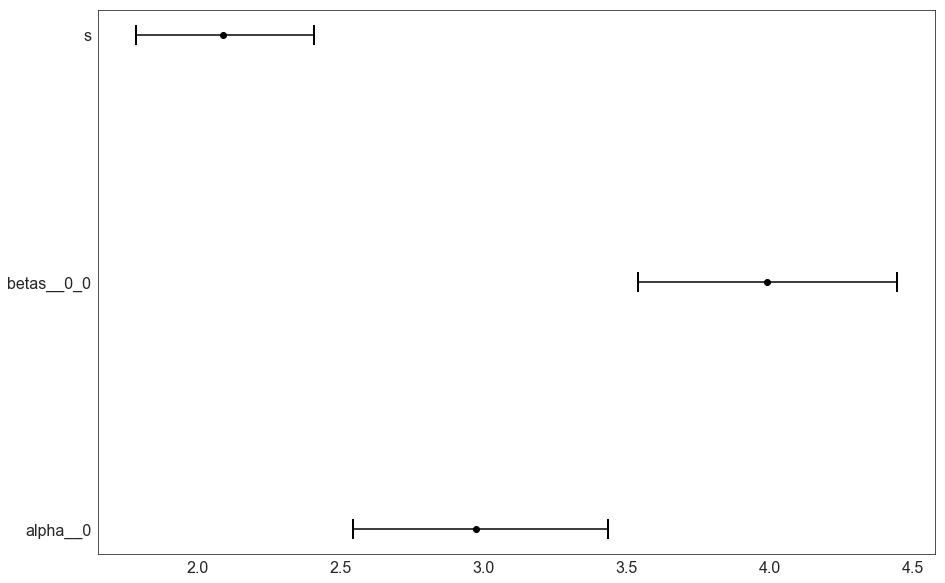

In [89]:
coefs = LR.summary.reset_index().rename(columns = {'index' : 'coef'})
ypa_ci = np.array(list(zip(-coefs['hpd_2.5'] + coefs['mean'], 
                            coefs['hpd_97.5'] - coefs['mean']))).T


plt.errorbar('mean', 'coef', xerr=ypa_ci, data=coefs, fmt='ko', 
             capthick=2, capsize=10, label=None)
plt.show()

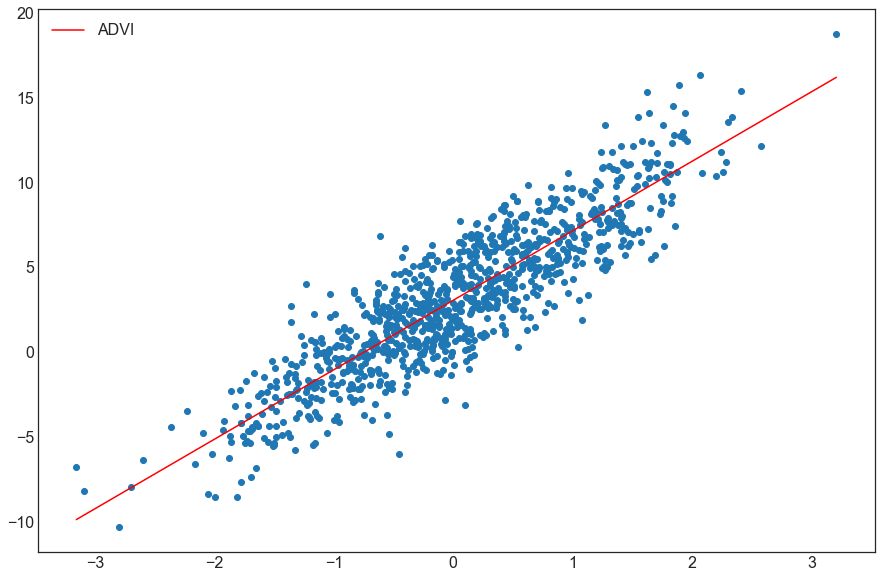

In [16]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']
fig1 = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.legend()

In [17]:
LR.save('pickle_jar/LR_jar/')

In [18]:
LR4 = LinearRegression()

In [19]:
LR4.load('pickle_jar/LR_jar/')

In [20]:
LR4.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1305.02it/s]


0.79057091131702029

Fit w/ NUTS
===

In [90]:
LR2 = LinearRegression()

In [91]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, betas, alpha]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:03<00:00, 2874.75draws/s]


LinearRegression()

In [92]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:26<00:00, 75.75it/s]


0.7819192378738402

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a27b828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119ab5e80>]], dtype=object)

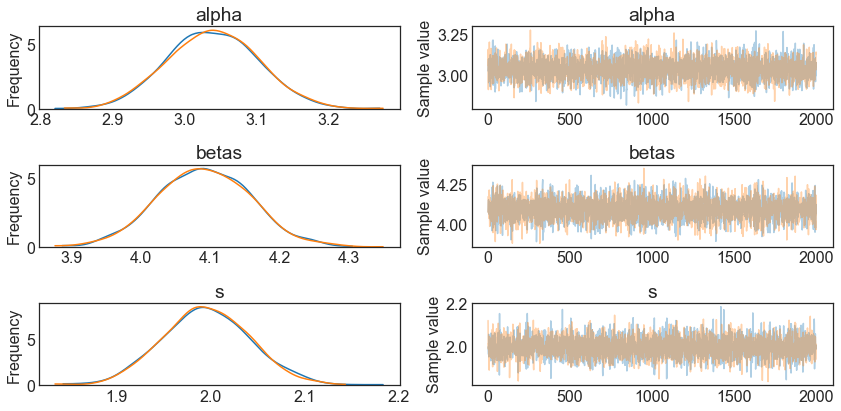

In [24]:
traceplot(LR2.trace)

Compare the two methods
===

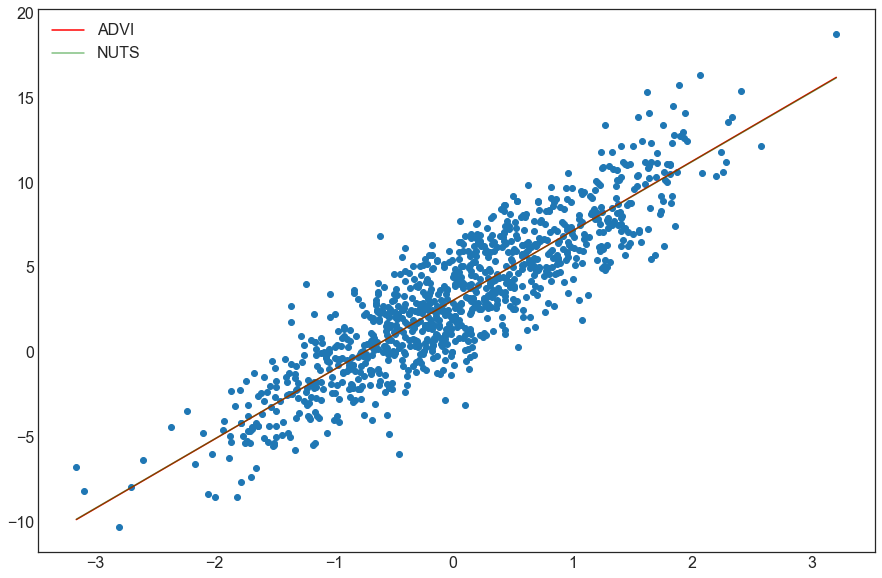

In [25]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']

m2 = LR2.summary['mean']['betas__0_0']
b2 = LR2.summary['mean']['alpha__0']
fig1 = plt.figure()
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.plot([min_x, max_x], [m2*min_x + b2, m2*max_x + b2], 'g', label='NUTS', alpha=0.5)
plt.legend()

Multiple predictors
===

In [100]:
num_pred = 10
X = np.random.randn(1000, num_pred)
noise = np.random.normal(1) * np.random.randn(1000,)
Y = X.dot(np.array([4, 5, 6,7,8,9,10,11,12,13])) + 3 + noise

In [101]:
Y = np.squeeze(Y)

In [102]:
LR3 = LinearRegression()

In [103]:
LR3.fit(X, Y)

Average Loss = 1,447.7: 100%|██████████| 200000/200000 [01:28<00:00, 2256.60it/s] 
Finished [100%]: Average Loss = 1,447.7


LinearRegression()

In [97]:
LR3.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,3.119045,0.171027,0.001666,2.790746,3.460984
betas__0_0,4.268993,0.178864,0.001656,3.917913,4.621775
betas__0_1,4.731094,0.166205,0.001542,4.394011,5.041296
s,4.829691,0.119465,0.001250,4.596629,5.063606
